In [74]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from matplotlib.pyplot import imshow
from glob import glob
import string
import textwrap

In [36]:
# ubuntu fonts
!ls /usr/share/fonts/truetype/freefont
!ls /usr/share/fonts/truetype/freefont/FreeSans.ttf
!ls google-fonts/ofl/akronim/Akronim-Regular.ttf

FreeMonoBoldOblique.ttf  FreeSansBoldOblique.ttf  FreeSerifBoldItalic.ttf
FreeMonoBold.ttf	 FreeSansBold.ttf	  FreeSerifBold.ttf
FreeMonoOblique.ttf	 FreeSansOblique.ttf	  FreeSerifItalic.ttf
FreeMono.ttf		 FreeSans.ttf		  FreeSerif.ttf
/usr/share/fonts/truetype/freefont/FreeSans.ttf
Akronim-Regular.ttf  DESCRIPTION.en_us.html  METADATA.pb  OFL.txt


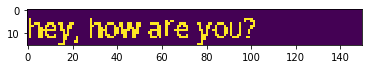

In [95]:
def create_image(
    sentence, 
    font_file, 
    font_size=12, 
    bg_color="black", 
    fg_color="white", 
    img_width=None, 
    img_height=None
):
    font = ImageFont.truetype(font_file, font_size)
    w, h = font.getsize(sentence)
    if img_width is not None:
        w = img_width
    if img_height is not None:
        h = img_height
    img = Image.new("1", (w, h), color=bg_color)
    draw = ImageDraw.Draw(img)
    draw.text((0,0), sentence, font=font, fill=fg_color)
    return img

img = create_image(
    sentence="hey, how are you?",
    font_file="google-fonts/ofl/oxygen/Oxygen-Bold.ttf",
    img_width=150
)

imshow(img)
img

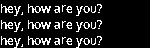

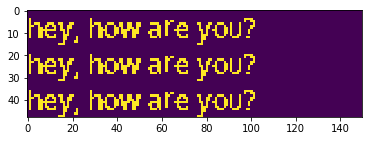

In [147]:
def stack_images(images, margin=0, y_gap=0, bg_color="black"):
    w = max(i.width for i in images) + (2 * margin)
    h = sum(i.height + y_gap for i in images) + (2 * margin)
    stacked = Image.new("1", (w, h), color=bg_color)
    for i, img in enumerate(images):
        stacked.paste(img, (margin, margin + (img.height + y_gap) * i))
    return stacked


x = stack_images([img,img,img])
imshow(x)
x

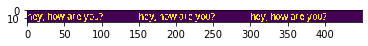

In [148]:
def append_images(images, margin=0, x_gap=0, bg_color="black"):
    w = sum(i.width + x_gap for i in images) + (2 * margin)
    h = max(i.height for i in images) + (2 * margin)
    appended = Image.new("1", (w, h), color=bg_color)
    for i, img in enumerate(images):
        appended.paste(img, (margin + (img.width + x_gap) * i, margin))
    return appended

x = append_images([img,img,img], margin=0)
imshow(x)
x

In [87]:
DOC = """The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries."""

In [88]:
textwrap.wrap(DOC) # width is optional

['The Normans (Norman: Nourmands; French: Normands; Latin: Normanni)',
 'were the people who in the 10th and 11th centuries gave their name to',
 'Normandy, a region in France. They were descended from Norse ("Norman"',
 'comes from "Norseman") raiders and pirates from Denmark, Iceland and',
 'Norway who, under their leader Rollo, agreed to swear fealty to King',
 'Charles III of West Francia. Through generations of assimilation and',
 'mixing with the native Frankish and Roman-Gaulish populations, their',
 'descendants would gradually merge with the Carolingian-based cultures',
 'of West Francia. The distinct cultural and ethnic identity of the',
 'Normans emerged initially in the first half of the 10th century, and',
 'it continued to evolve over the succeeding centuries.']

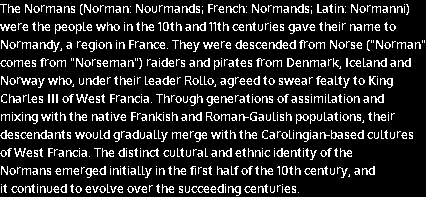

In [125]:
def doc_to_image(doc, font_file, font_size=12, line_gap=2):
    sentences = textwrap.wrap(doc)
    images = [create_image(s, font_file, font_size) for s in sentences]
    stacked = stack_images(images, line_gap)
    return stacked
    
doc_to_image(DOC, "google-fonts/ofl/oxygen/Oxygen-Bold.ttf", 12, 2)